In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

In [2]:
%load_ext autoreload
%autoreload 1

In [3]:
%aimport special
%aimport optim
%aimport lossfuncs

## n2

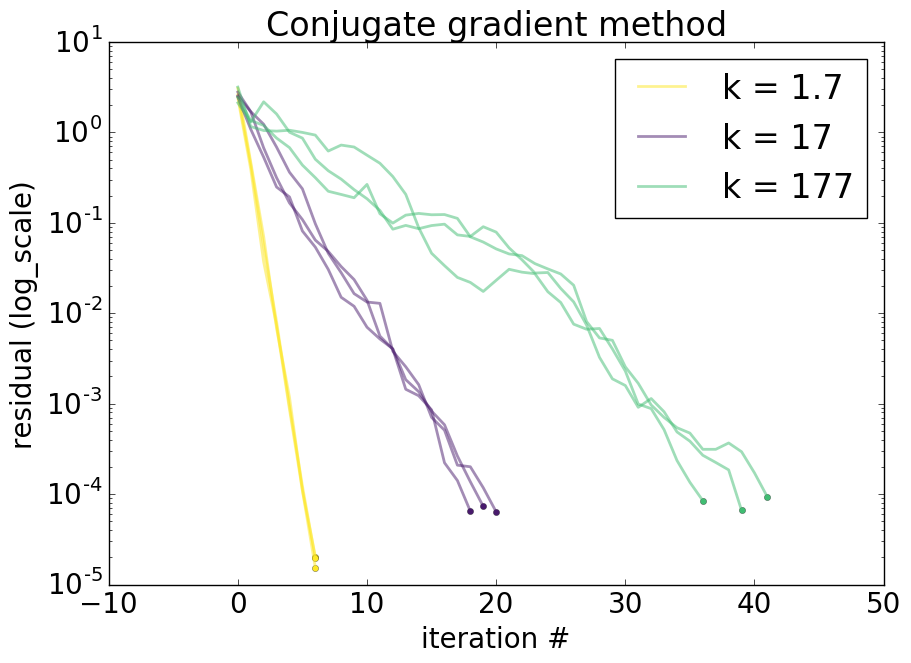

In [48]:
n = 100
matr_num = 3
plt.figure(figsize=(10, 7))
plt.rcParams.update({'font.size': 20})
for k in [1.7, 17, 177]:
    for i in range(matr_num):
        A = special.gen_symm_matr(k, n)
        b = np.random.randn(n)

        ans = optim.cg(lambda x: np.dot(A, x), b, np.zeros(n), trace=True)
        y = ans[2]['norm_r']

        plt.semilogy(y, label='k = %s' % k if i == 0 else "",
                     c=cm.viridis(k), linewidth=2, alpha=0.5)
        
        plt.scatter([y.size - 1], y[-1], c=cm.viridis(k), linewidths=0.2)

plt.title('Conjugate gradient method')
plt.xlabel('iteration #')
plt.ylabel('residual (log_scale)')
plt.legend(loc='best', )
plt.show()

## n4

In [5]:
def logloss(w, X, y, reg_coef):
    A = -y[:, np.newaxis] * X
    return np.logaddexp(0, A.dot(w)).mean() + reg_coef * np.dot(w, w) / 2

In [6]:
n = 100
d = 10
k = 3
w = np.random.rand(k, d)
X = np.random.rand(n, d)
# X[X > 0.1] = 0
y = np.ones(n)
y[np.random.rand(n) > 0.5] = -1

In [7]:
for i in range(k):
    tmp1 = lossfuncs.logistic(w[i], X, y, 1)
    tmp2 = special.grad_finite_diff(lambda x: logloss(x, X, y, 1), w[i])
    print(np.sum(tmp1[1] - tmp2) < 1e-5)

True
True
True


In [8]:
for i in range(k):
    v = np.random.rand() * w[i]
    tmp1 = lossfuncs.logistic_hess_vec(w[i], v, X, y, 1)
    tmp2 = special.hess_vec_finite_diff(lambda x: logloss(x, X, y, 1), w[i], v)
    print(np.sum(tmp1 - tmp2) < 1e-4)

True
True
True


## n5

In [77]:
n = 10
matr_num = 3
k = 17
A = special.gen_symm_matr(k, n)
b = np.random.randn(n)

def func(x):
    return (
        0.5 * x.dot(A.dot(x)) - x.dot(b),
        A.dot(x) - b
    )

def hess_vec(x, v):
    return np.dot(A, v)

exact = np.linalg.solve(A, b)
ans1 = optim.cg(lambda x: hess_vec(0, x), b, np.zeros(n))
ans2 = optim.ncg(func, np.zeros(n))
ans3 = optim.lbfgs(func, np.zeros(n))
ans4 = optim.hfn(func, np.zeros(n), hess_vec)

In [78]:
exact

array([ 0.40243374,  0.34200222,  0.10647263, -0.36348967,  0.016728  ,
        0.89714768,  0.88484946,  0.9757804 ,  0.08153104, -0.60058193])

In [79]:
ans1

(array([ 0.40243374,  0.34200222,  0.10647263, -0.36348967,  0.016728  ,
         0.89714768,  0.88484946,  0.9757804 ,  0.08153104, -0.60058193]), 0)

In [80]:
ans2

(array([ 0.40243374,  0.34200222,  0.10647263, -0.36348967,  0.016728  ,
         0.89714768,  0.88484946,  0.9757804 ,  0.08153104, -0.60058193]),
 -2.1342103217921342,
 0)

In [81]:
ans3

(array([ 0.40240338,  0.34198677,  0.10646385, -0.36345572,  0.0167084 ,
         0.89705913,  0.88476369,  0.9756735 ,  0.08152849, -0.60052635]),
 -2.1342103051053454,
 0)

In [82]:
ans4

(array([ 0.40241828,  0.34199951,  0.10646883, -0.36348044,  0.01672217,
         0.8971043 ,  0.88480363,  0.9757281 ,  0.08153102, -0.60056039]),
 -2.1342103175622364,
 0)

In [15]:
# def rosenbrock(x):
#     x, y = x
#     return (
#         (1 - x) ** 2 + 100 * (y - x ** 2) ** 2,
#         np.array([2 * x * (1 - 200 * (y - x ** 2)) - 2,
#                   200 * (y - x ** 2)])
#     )

# def rosenbrock_hess(x, v):
#     x, y = x
#     return (
#         np.array([
#             [1200 * x ** 2 - 400 * y + 2, -400 * x],
#             [-400 * x, 200],
#         ]).dot(v)
#     )

# x, f, st, hist = optim.hfn(rosenbrock, np.array([10.0, 20.0]), rosenbrock_hess, max_iter=5000, trace=True)
# x, f, st, hist['norm_g'].size

## n6

In [4]:
from sklearn.datasets import load_svmlight_file

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize

In [6]:
X, y = dict(), dict()
X['train'], y['train'] = dict(), dict()
X['test'], y['test'] = dict(), dict()

In [7]:
def read_dset(path, postf=''):
    n_f = 123 if name == "a7a" else None
    
    X, y = load_svmlight_file(path + postf, n_features=n_f)
    X = normalize(X)
    if y.min() > -0.5:
        y = 2 * (y - 0.5)
        
    return X, y

In [8]:
names_low = ["a7a", "madelon", "svmguide1"]
for name in names_low:
    X['train'][name], y['train'][name] = read_dset("data/low/" + name)
    X['test'][name], y['test'][name] = read_dset("data/low/" + name, ".t")

# names_high = ["leu", "gisette_scale", "rcv1"]
# for name in names_high:
#     X['train'][name], y['train'][name] = read_dset("data/high/" + name)
#     X['test'][name], y['test'][name] = read_dset("data/high/" + name, ".t")

In [90]:
# name = 'rcv1'
# X_tr, y_tr = X['train'][name], y['train'][name]
# n, d = X_tr.shape
# func = lambda x: lossfuncs.logistic(x, X_tr, y_tr, 1 / n)
# hess = lambda x, v: lossfuncs.logistic_hess_vec(x, v, X_tr, y_tr, 1 / n)
# tmp = optim.ncg(func, np.zeros(d, dtype=np.float)) #, hess)

# y_te = y['test'][name]
# accuracy_score(y_te, np.sign(X['test'][name].dot(tmp[0])))

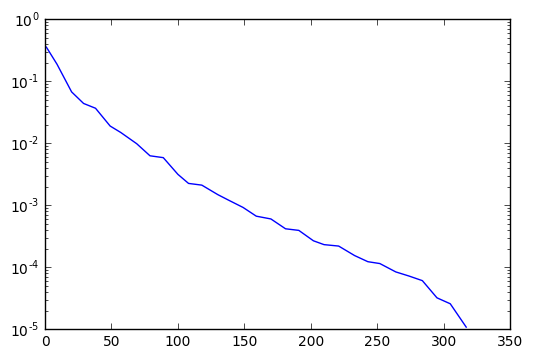

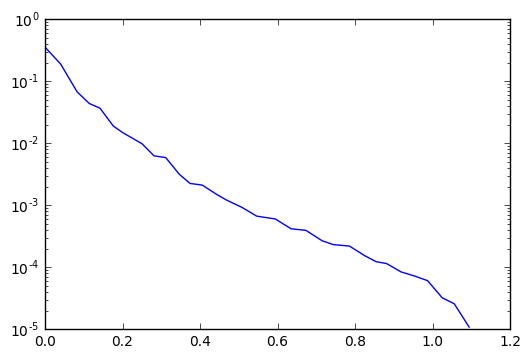

/home/ospanoff/.pyenv/versions/3.5.1/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [9]:
res = dict()
for k, name in enumerate(names_low):
    X_tr = X['train'][name].toarray()
    n, d = X_tr.shape
    def func(x):
        return lossfuncs.logistic(x, X_tr, y['train'][name], 1 / n)
    def hess(x, v):
        return lossfuncs.logistic_hess_vec(x, v, X_tr, y['train'][name], 1 / n)
        
    w, f_opt, _, hist = optim.ncg(func, np.zeros(d, dtype=np.float), trace=True)
    
    y = np.abs(hist['f'] - f_opt)
    x1 = hist['n_evals']
    x2 = hist['elaps_t']
    
    plt.semilogy(x1, y) #, c=cm.viridis(k), linewidth=2, alpha=0.5)
    
    plt.show()
    
    plt.semilogy(x2, y) #, c=cm.viridis(k), linewidth=2, alpha=0.5)
        
    plt.show()
#     plt.scatter([y.size - 1], y[-1], c=cm.viridis(k), linewidths=0.2)

In [13]:
func(np.zeros(d))

/home/ospanoff/.pyenv/versions/3.5.1/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices